## 179 - Profiling Code INSIDE a Notebook!

[Youtube](https://www.youtube.com/watch?v=FxxV19COBJQ)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import metpy.calc as mpcalc
from metpy.units import units
from time import sleep
%matplotlib inline

In [2]:
def generate_u_v_data(ndata, low = -15, high = 15):
 """
 Generate uniformly distributed u, v wind data
 """
 sleep(1)
 return (np.random.uniform(low = low, high = high, size = ndata) * units('kts'), np.random.uniform(low = low, high = high, size = ndata) * units('kts'))

def work_up_data(u, v):
 """
 Change things to speed/direction from u, v
 """
 return mpcalc.wind_speed(u, v), mpcalc.wind_direction(u, v)

def plot_data(speed, direction):
 fig = plt.figure()
 ax1 = plt.subplot(211)
 ax2 = plt.subplot(212)
 ax1.plot(speed)
 ax2.plot(direction)

def do_my_data_processing():
 u, v = generate_u_v_data(100000)
 speed, direction = work_up_data(u, v)
 plot_data(speed, direction)

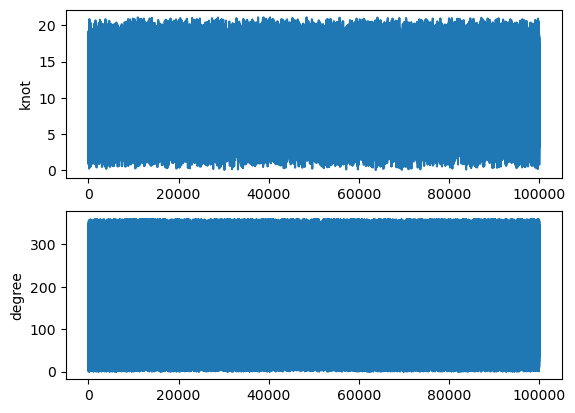

In [3]:
do_my_data_processing()

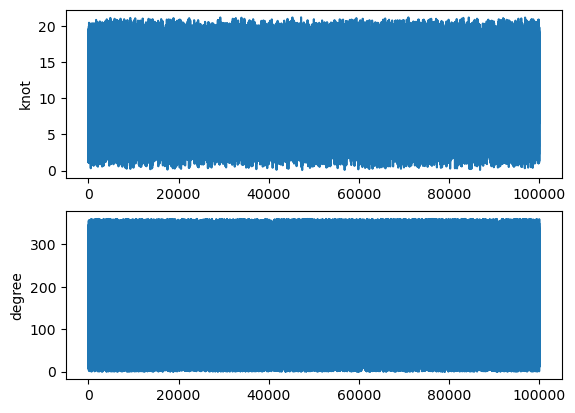

         14657265 function calls (14456440 primitive calls) in 8.680 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    8.680    8.680 {built-in method builtins.exec}
        1    0.000    0.000    8.680    8.680 <string>:1(<module>)
        1    0.000    0.000    8.680    8.680 3550998801.py:21(do_my_data_processing)
        1    0.000    0.000    7.464    7.464 3550998801.py:14(plot_data)
        2    0.000    0.000    7.364    3.682 _axes.py:1391(plot)
        2    0.000    0.000    7.349    3.674 _base.py:2279(add_line)
        2    0.000    0.000    7.347    3.674 _base.py:2307(_update_line_limits)
       14    0.014    0.001    7.344    0.525 lines.py:996(get_path)
       14    0.002    0.000    7.330    0.524 lines.py:649(recache)
       12    0.000    0.000    7.296    0.608 axis.py:1495(convert_units)
       84    0.000    0.000    7.296    0.087 artist.py:255(convert_yunits)
        2

In [4]:
%prun -s cumulative do_my_data_processing()

In [5]:
!pip install line_profiler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.1/662.1 kB 4.3 MB/s eta 0:00:00a 0:00:01


In [6]:
%load_ext line_profiler

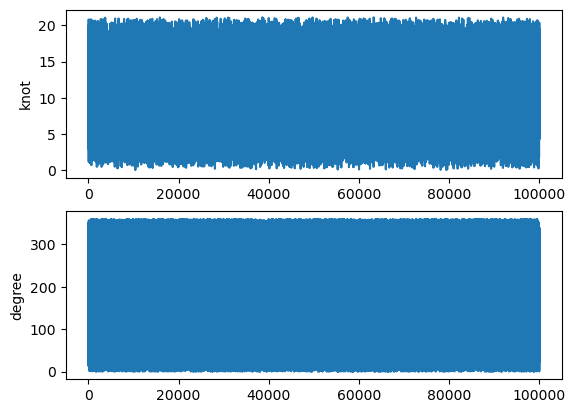

Timer unit: 1e-09 s

Total time: 6.87079 s
File: /tmp/ipykernel_1011845/3550998801.py
Function: do_my_data_processing at line 21

Line #      Hits         Time  Per Hit   % Time  Line Contents
    21                                           def do_my_data_processing():
    22         1 1178185209.0 1178185209.0     17.1   u, v = generate_u_v_data(100000)
    23         1   19938850.0 19938850.0      0.3   speed, direction = work_up_data(u, v)
    24         1 5672667632.0 5672667632.0     82.6   plot_data(speed, direction)

In [7]:
%lprun -f do_my_data_processing do_my_data_processing()

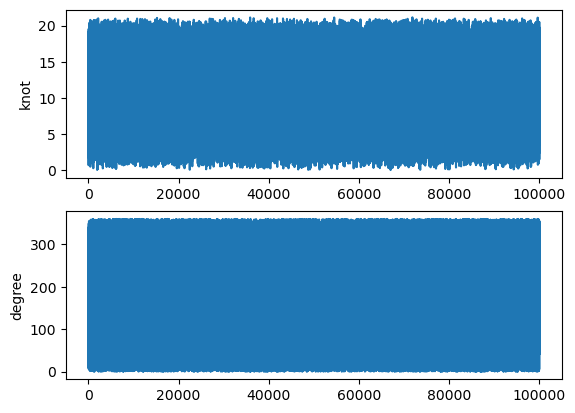

Timer unit: 1e-09 s

Total time: 5.70637 s
File: /tmp/ipykernel_1011845/3550998801.py
Function: plot_data at line 14

Line #      Hits         Time  Per Hit   % Time  Line Contents
    14                                           def plot_data(speed, direction):
    15         1    2112779.0 2112779.0      0.0   fig = plt.figure()
    16         1   23307066.0 23307066.0      0.4   ax1 = plt.subplot(211)
    17         1   24547054.0 24547054.0      0.4   ax2 = plt.subplot(212)
    18         1 2847076986.0 2847076986.0     49.9   ax1.plot(speed)
    19         1 2809328342.0 2809328342.0     49.2   ax2.plot(direction)

In [8]:
%lprun -f plot_data do_my_data_processing()

In [9]:
def plot_data(speed, direction):
 fig = plt.figure()
 ax1 = plt.subplot(211)
 ax2 = plt.subplot(212)
 ax1.plot(speed[::100])
 ax2.plot(direction[::100])

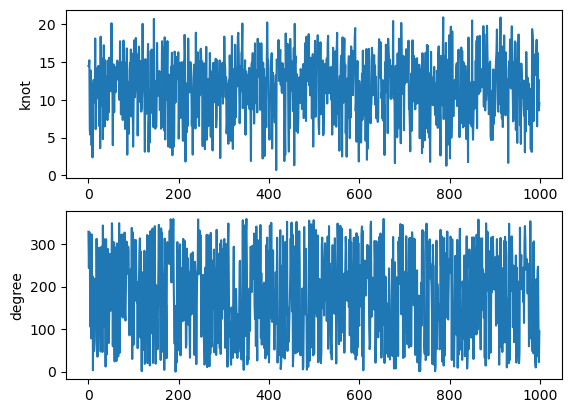

Timer unit: 1e-09 s

Total time: 1.44508 s
File: /tmp/ipykernel_1011845/3550998801.py
Function: do_my_data_processing at line 21

Line #      Hits         Time  Per Hit   % Time  Line Contents
    21                                           def do_my_data_processing():
    22         1 1161110337.0 1161110337.0     80.3   u, v = generate_u_v_data(100000)
    23         1   23605765.0 23605765.0      1.6   speed, direction = work_up_data(u, v)
    24         1  260365689.0 260365689.0     18.0   plot_data(speed, direction)

In [10]:
%lprun -f do_my_data_processing do_my_data_processing()